# Regression (Linear, Multi variable, Polinominal)

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
import os 

BASE_DIR = "/Users/user/Desktop/Projects/data-science/ml-data"
FILE_DIR = "1-studyhours.csv"

path = os.path.join(BASE_DIR, FILE_DIR)

df = pd.read_csv(path)

df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


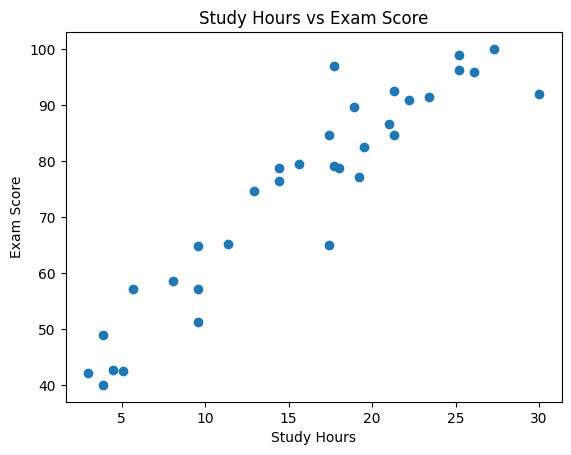

In [6]:
plt.scatter(df["Study Hours"], df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()

In [7]:
# X is expected to be given as DataFrame y is expected to be given as Series
X = df[["Study Hours"]]
y = df["Exam Score"]

In [8]:
# train - test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardization formula: (x - mean / std)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled, y_train)

model.predict(X_test_scaled)



array([94.75081875, 77.63941854, 59.15910631, 66.6881224 , 94.75081875,
       76.95496253, 85.85289064])

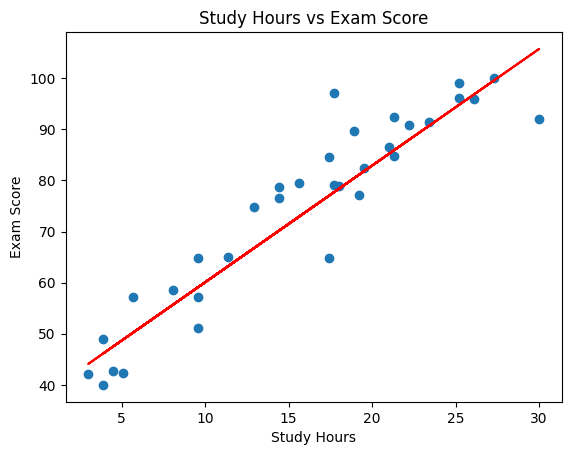

In [16]:
plt.scatter(df["Study Hours"], df["Exam Score"])
plt.plot(X_train, model.predict(X_train_scaled), color="red")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()

In [17]:
# Success Metrics => R^2 and Adjusted R^2

# R^2 -> Modelin doğruluğunu ölçer gereksiz değişkenleri göz ardı eder
# Adjusted R^2 -> Modelin doğruluğunu ölçer gereksiz değişkenleri göz ardı etmez

# R^2 = 1 - (SSR / SST)
# SSR -> Sum of Squared Residuals
# SST -> Total Sum of Squares

# Adjusted R^2 = 1 - (1 - R^2) * (n - 1) / (n - p - 1)



In [23]:
y_pred_test = model.predict(X_test_scaled)

y_pred_test

array([94.75081875, 77.63941854, 59.15910631, 66.6881224 , 94.75081875,
       76.95496253, 85.85289064])

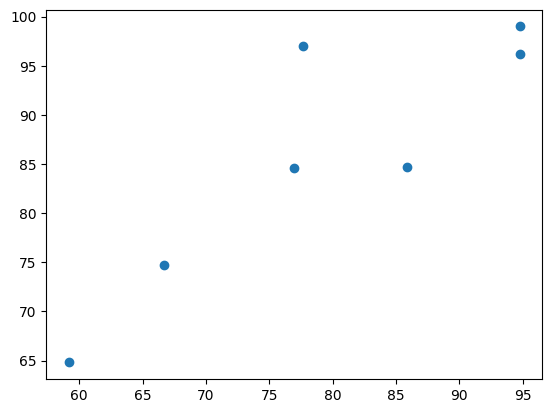

In [24]:
plt.scatter(y_pred_test, y_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred_test)

r2 = r2_score(y_test, y_pred_test)

mae = mean_absolute_error(y_test, y_pred_test)

print("MSE: ", mse, "\nR2: ", r2, "\nMAE: ", mae)

MSE:  78.68191446465701 
R2:  0.4349170848122318 
MAE:  6.787091909266651


# Multi Class Regression

In [27]:
FILE_DIR = "2-multiplegradesdataset.csv"

path = os.path.join(BASE_DIR, FILE_DIR)

df = pd.read_csv(path)

df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


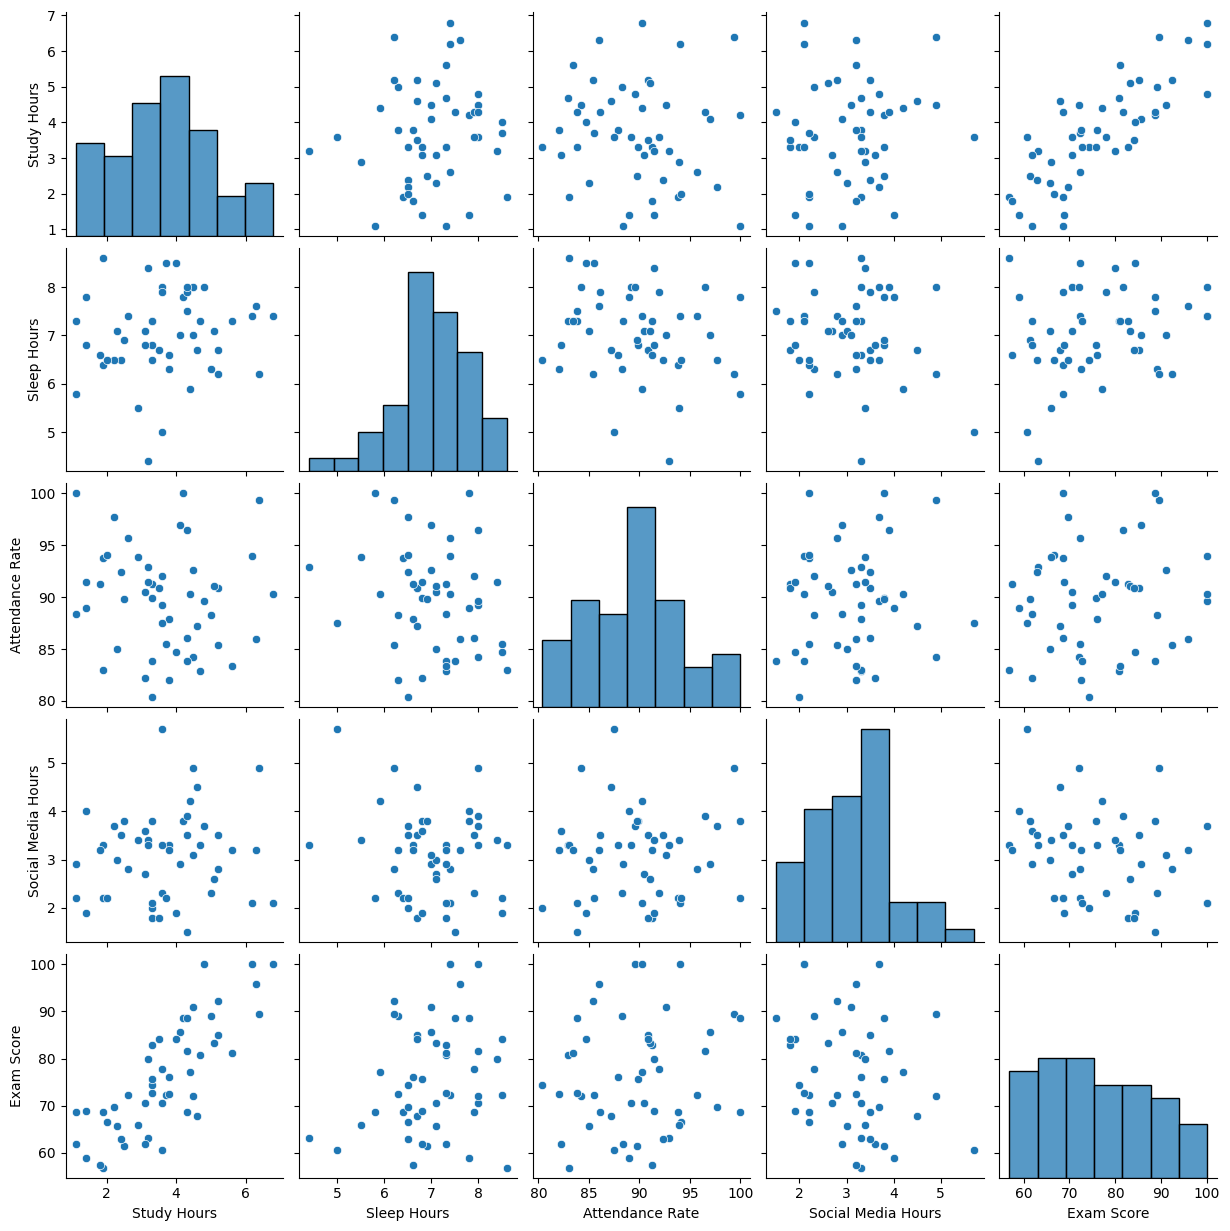

In [28]:
sns.pairplot(df)

plt.show()

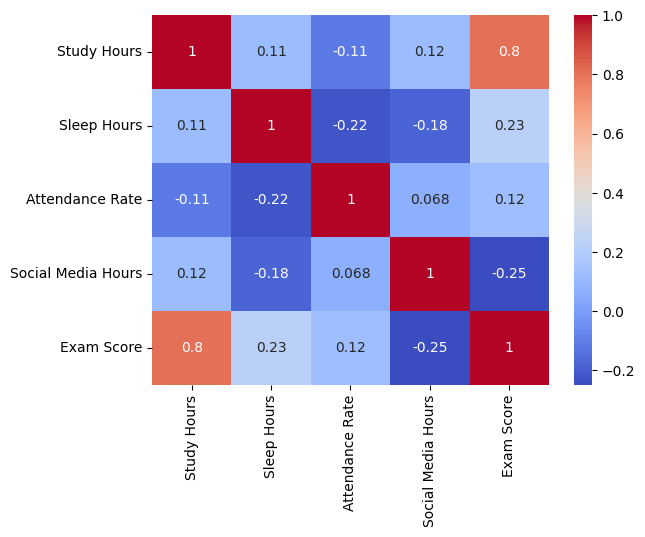

In [29]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

plt.show()

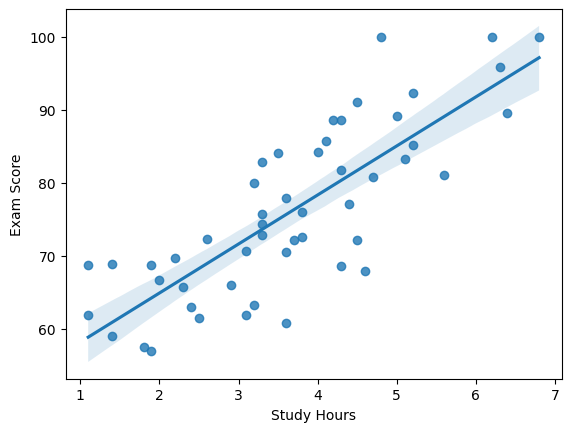

In [30]:
sns.regplot(x="Study Hours", y="Exam Score", data=df)

plt.show()

In [31]:
X = df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]] # df.iloc[:, :-1]
y = df["Exam Score"] # df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

In [32]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
y_pred_test = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

print("MSE: ", mse, "\nR2: ", r2, "\nMAE: ", mae)

MSE:  14.744713821185437 
R2:  0.8702442761946607 
MAE:  3.170067406626258


In [36]:
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

print("MSE: ", mse, "\nR2: ", r2, "\nMAE: ", mae)

MSE:  14.744713821185437 
R2:  0.8702442761946607 
MAE:  3.170067406626258


# Polinominal Regression

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 

In [2]:
import os 
BASE_DIR = "/Users/user/Desktop/Projects/data-science/ml-data"
FILE_DIR = "3-customersatisfaction.csv"
path = os.path.join(BASE_DIR, FILE_DIR)

df = pd.read_csv(path)
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


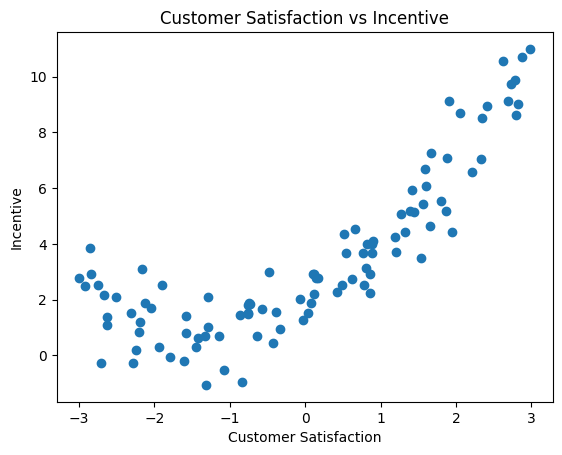

In [3]:
plt.scatter(x=df["Customer Satisfaction"], y=df["Incentive"])
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.title("Customer Satisfaction vs Incentive")
plt.show()

<Axes: xlabel='Customer Satisfaction', ylabel='Incentive'>

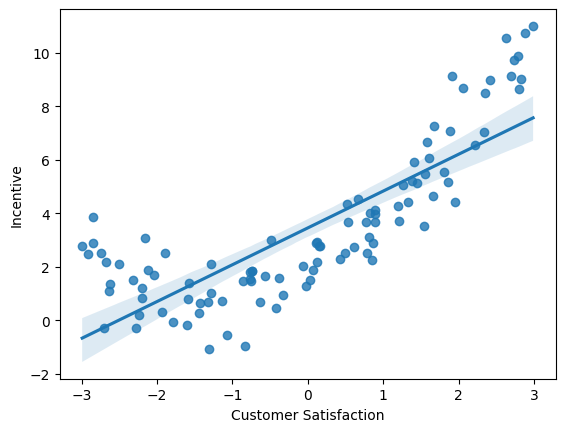

In [4]:
sns.regplot(x="Customer Satisfaction", y="Incentive", data=df)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline


In [12]:
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()


In [16]:
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [22]:
score = r2_score(y_test, y_pred)
score

0.6703332968032584

In [32]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [33]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test_poly)


In [35]:
score = r2_score(y_test, y_pred)
score

-1.5204132521996545

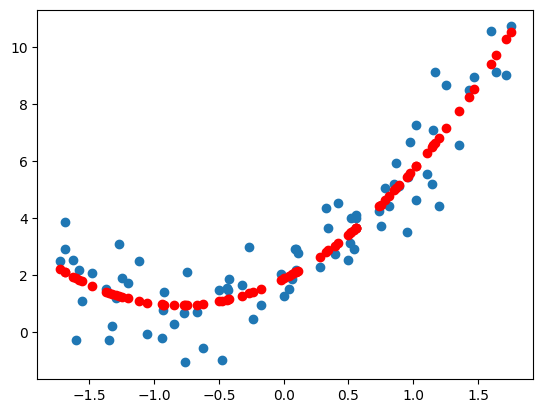

In [39]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, model.predict(X_train_poly), color="r")
plt.show()

# Pipeline 

In [ ]:
def poly_regression(X_train: pd.DataFrame, y_train: pd.Series, 
                    X_test: pd.DataFrame, y_test: pd.Series, degree: int):
    scaler = StandardScaler()
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    pipe = Pipeline(
        [
            ("scaler", scaler),
            ("poly_features", poly_features),
            ("lin_reg", lin_reg)
        ]
    )
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    print("Score: ", score)
